In [1]:
from hossam import *
from pandas import concat
from pycaret.regression import *

In [2]:
origin=load_data('restaurant_sales_preprocessed')
origin.set_index('date', inplace=True)
origin['holiday']=origin['holiday'].astype('category')
origin['weekend']=origin['weekend'].astype('category')
origin.info()

어느 식당의 1년간 일별 매출을 기록한 데이터의 전처리 완료 버전(명목형이 이진변수만 있으므로 더미변수는 처리하지 않음)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353 entries, 2024-01-01 to 2024-12-30
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sales           353 non-null    float64 
 1   visitors        353 non-null    int64   
 2   avg_price       353 non-null    int64   
 3   marketing_cost  353 non-null    float64 
 4   delivery_ratio  353 non-null    float64 
 5   rain_mm         353 non-null    float64 
 6   temperature     353 non-null    float64 
 7   holiday         353 non-null    category
 8   weekend         353 non-null    category
dtypes: category(2), float64(5), int64(2)
memory usage: 23.0 KB


In [4]:
s=RegressionExperiment()
s.setup(
    #----------------------------------------
    # 필수 지정
    #----------------------------------------
    # 데이터셋 지정
    data=origin,
    # 예측 목표 변수 지정(종속변수)
    target='sales',
    # 랜덤 시드 고정
    session_id=52,
    # 훈련 데이터 비율 (기본값=0.7)
    train_size=0.75,
    # 교차검증 폴드 수 지정
    fold=5,
    # 처리과정 출력 안함
    verbose=False,
    # GPU 사용 여부 지정
    use_gpu=False,
    #----------------------------------------
    # 전처리 설정 (1)
    #----------------------------------------
    # 범주형 변수 지정 (기본값 None)
    categorical_features=['weekend', 'holiday'],
    # 생략할 변수 지정 (기본값 None)
    ignore_features=[],
    # 데이터 정규화/표준화 활성화 (기본값 False)
    normalize=True,
    # 데이터 정규화/표준화 방법 선택
    # 'minmax', 'maxabs', 'robust', 'zscore'
    normalize_method='zscore',
    #----------------------------------------
    # 전처리 설정 (2) - 왠만하면 쓰지 말기
    #----------------------------------------
    # 이상치 제거 (기본값 Flase, IQR 범위 밖의 값을 삭제함)
    remove_outliers=False,
    # 이상치 제거 임계값 (기본값 0.05, 상하위 몇 %를 이상치로 간주할 지 지정)
    outliers_threshold=0.05,
    # 종속변수 변환 (기본값 False)
    transform_target=False,
    # 변수 선택 (기본값 False)
    feature_selection=False
)

In [5]:
s.pull()

,Description,Value
0,Session id,52
1,Target,sales
2,Target type,Regression
3,Original data shape,"(353, 9)"
4,Transformed data shape,"(353, 9)"
5,Transformed train set shape,"(264, 9)"
6,Transformed test set shape,"(89, 9)"
7,Numeric features,6
8,Categorical features,2
9,Preprocess,True


In [6]:
s.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPursuit,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [7]:
model=s.create_model('rf')
model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1908,0.0553,0.2352,0.6325,0.0135,0.0116
1,0.1624,0.0444,0.2106,0.7492,0.0122,0.0100
2,0.1575,0.0390,0.1976,0.7546,0.0115,0.0097
3,0.1690,0.0441,0.2101,0.6170,0.0121,0.0104
4,0.1956,0.0642,0.2534,0.4657,0.0146,0.0119
Mean,0.1751,0.0494,0.2214,0.6438,0.0128,0.0107
Std,0.0154,0.0091,0.0201,0.1058,0.0011,0.0009


RandomForestRegressor(n_jobs=-1, random_state=52)

In [8]:
%%time
tuned=s.tune_model(
    estimator=model,
    optimize='RMSE',
    n_iter=30,
    fold=5,
    choose_better=True,
    verbose=False,
    early_stopping=True,

    # 하이퍼파라미터 탐색 방법 (grid=전체탐색, random=무작위탐색)
    search_algorithm='grid',

    # 직접 하이퍼파라미터 범위 구성하기 (생략할 경우 자동 구성)
    custom_grid={
        'n_estimators':[300, 500],
        'max_depth':[None, 10],
        'min_samples_leaf':[5, 10],
        'max_features':['sqrt', 1.0]
    }
)
tuned

CPU times: total: 1.27 s
Wall time: 8.58 s


RandomForestRegressor(min_samples_leaf=5, n_estimators=300, n_jobs=-1,
                      random_state=52)

In [9]:
tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 52,
 'verbose': 0,
 'warm_start': False}

In [10]:
s.evaluate_model(estimator=tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

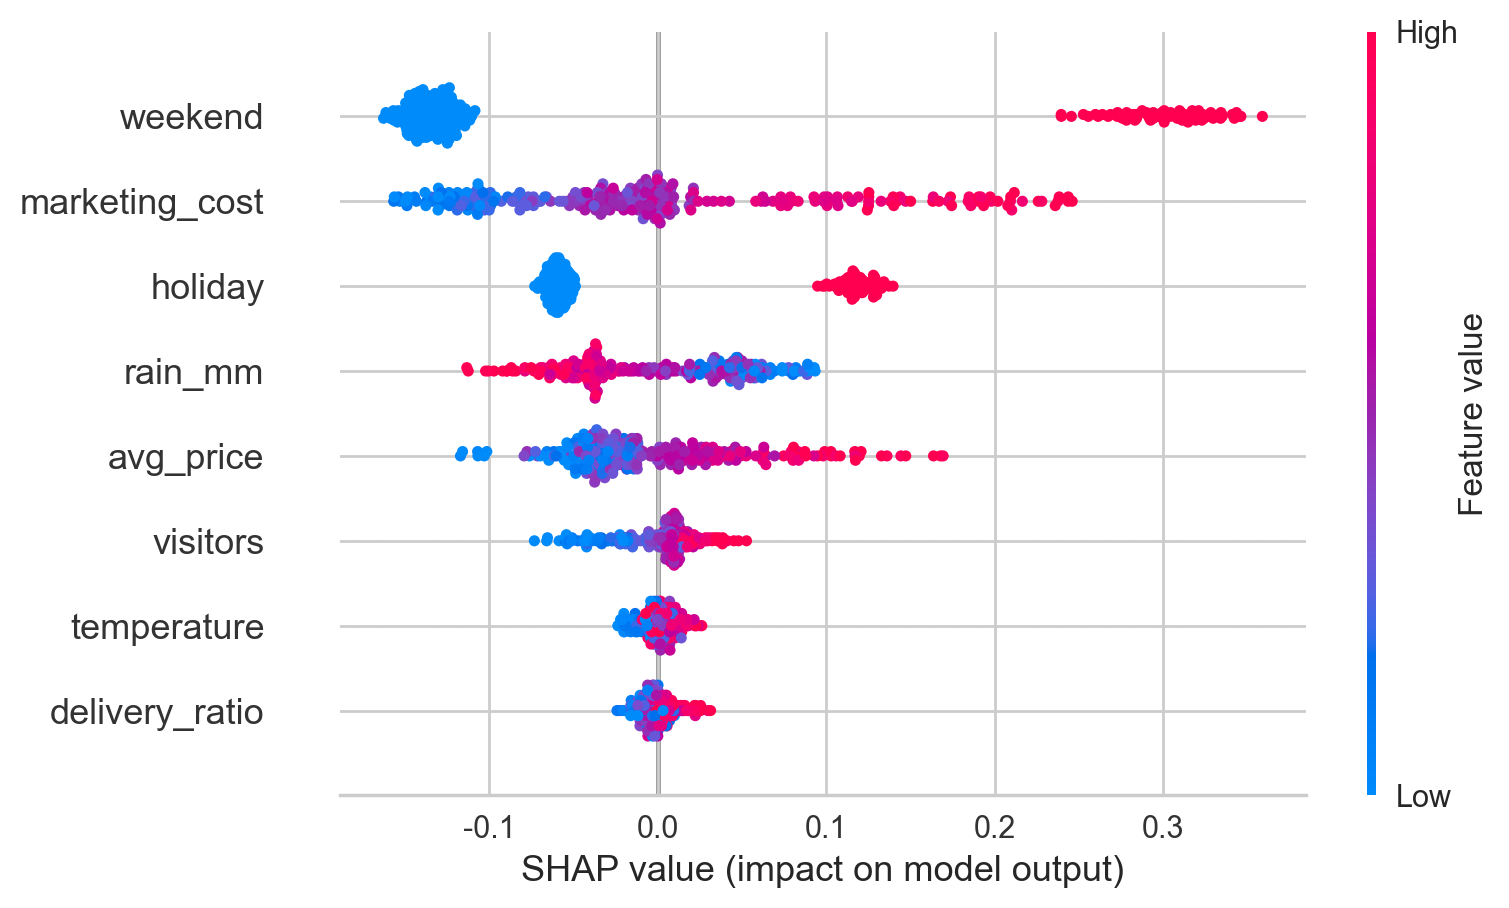

In [11]:
s.interpret_model(estimator=tuned, plot='summary', use_train_data=True)

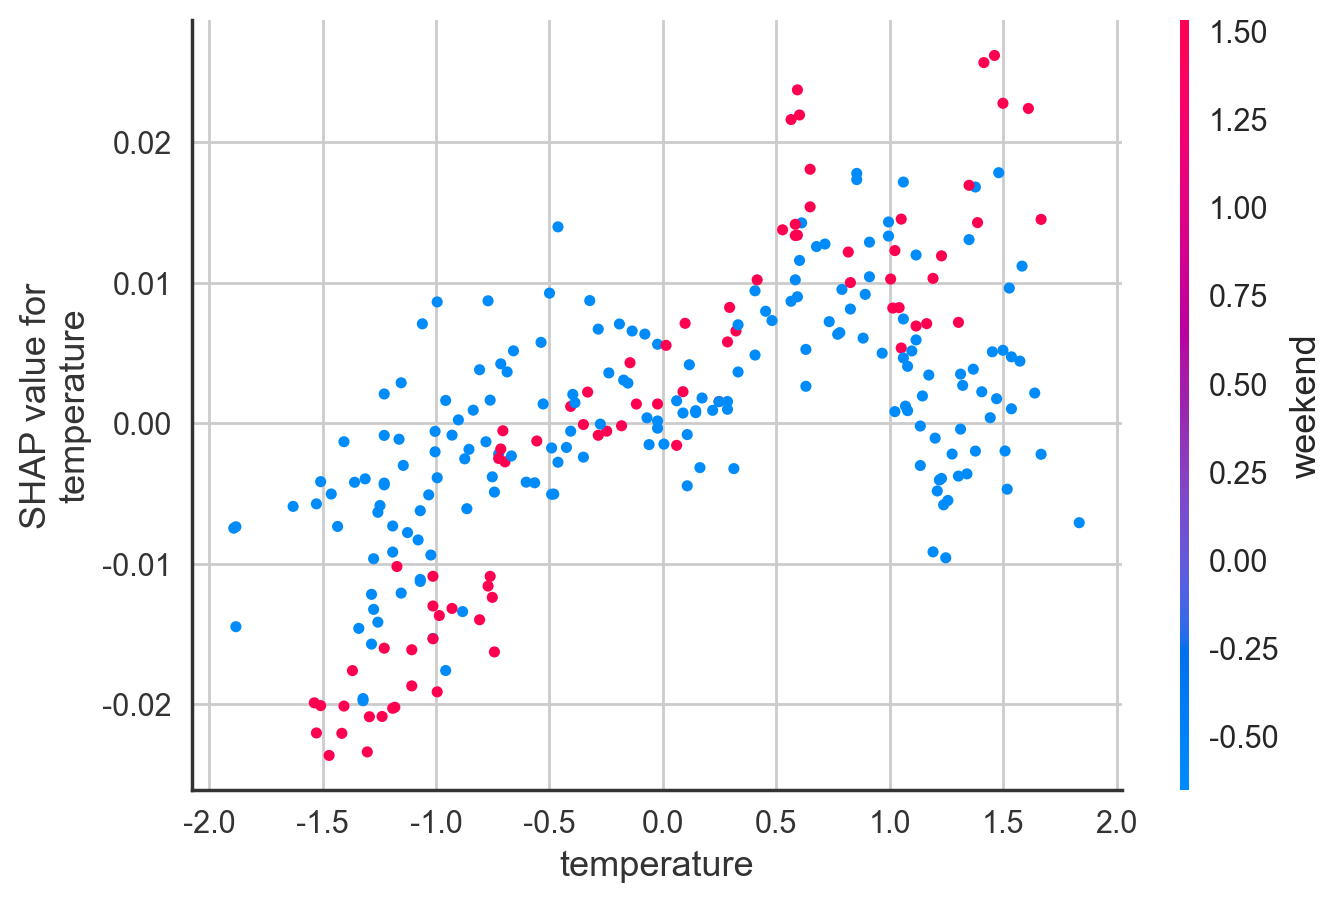

In [12]:
s.interpret_model(estimator=tuned, plot='correlation', use_train_data=True, feature='temperature')

In [13]:
x=s.get_config('X')
y=s.get_config('y')

x_train=s.get_config('X_train')
y_train=s.get_config('y_train')

x_test=s.get_config('X_test')
y_test=s.get_config('X_test')

x_train_transformed=s.get_config('X_train_transformed')
y_train_transformed=s.get_config('y_train_transformed')

x_test_transformed=s.get_config('X_test_transformed')
y_test_transformed=s.get_config('y_test_transformed')

x_transformed=concat([x_train_transformed, x_test_transformed])
y_transformed=concat([y_train_transformed, y_test_transformed])

(x.shape, y.shape), (x_train.shape, y_train.shape), (x_test.shape, y_test.shape), (x_train_transformed.shape, y_train_transformed.shape), (x_test_transformed.shape, y_test_transformed.shape)

(((353, 8), (353,)),
 ((264, 8), (264,)),
 ((89, 8), (89, 8)),
 ((264, 8), (264,)),
 ((89, 8), (89,)))

In [14]:
x_train

,visitors,avg_price,marketing_cost,delivery_ratio,rain_mm,temperature,holiday,weekend
date,,,,,,,,
2024-06-11,129,8590,8.987,0.410,2.028,14.200,0,0
2024-06-20,115,22020,8.412,0.380,2.219,8.000,0,0
2024-08-25,115,14630,9.457,0.490,2.251,-2.900,1,1
2024-11-22,137,16830,8.810,0.380,1.194,0.700,0,0
2024-12-30,106,13370,8.537,0.480,2.197,9.600,0,0
...,...,...,...,...,...,...,...,...
2024-03-30,123,13930,7.901,0.530,2.015,27.700,1,1
2024-06-04,114,25370,8.700,0.510,1.589,11.400,0,0
2024-01-14,101,11620,8.319,0.210,0.916,12.900,1,1


In [15]:
x_train_transformed

,visitors,avg_price,marketing_cost,delivery_ratio,rain_mm,temperature,holiday,weekend
date,,,,,,,,
2024-06-11,0.916,-1.801,0.229,-0.296,0.594,0.406,-0.731,-0.653
2024-06-20,-0.415,1.761,-0.740,-0.549,0.884,-0.173,-0.731,-0.653
2024-08-25,-0.415,-0.199,1.020,0.378,0.933,-1.191,1.367,1.530
2024-11-22,1.677,0.385,-0.070,-0.549,-0.675,-0.855,-0.731,-0.653
2024-12-30,-1.271,-0.533,-0.529,0.294,0.851,-0.023,-0.731,-0.653
...,...,...,...,...,...,...,...,...
2024-03-30,0.345,-0.384,-1.600,0.715,0.573,1.667,1.367,1.530
2024-06-04,-0.510,2.650,-0.256,0.546,-0.074,0.145,-0.731,-0.653
2024-01-14,-1.747,-0.997,-0.897,-1.981,-1.097,0.285,1.367,1.530


In [16]:
pipeline=s.get_config('pipeline')
display(pipeline)

Pipeline(memory=FastMemory(location=C:\Users\itwill\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['visitors', 'avg_price',
                                             'marketing_cost', 'delivery_ratio',
                                             'rain_mm', 'temperature'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['weekend', 'holiday'],
                                    transformer=SimpleImputer(strat...
                 TransformerWrapper(include=['weekend', 'holiday'],
                                    transformer=OrdinalEncoder(cols=['weekend',
                                                                     'holiday'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'weekend',
                                                                         'data_type': dtype('float64'),
                                                                         'mapping': 0.000    0
1.000    1
NaN     -1
dtype: int64},
                                                                        {'col': 'holiday',
                                                                         'data_type': dtype('float64'),
                                                                         'mapping': 0.000    0
1.000    1
NaN     -1
dtype: int64}]))),
                ('normalize',
                 TransformerWrapper(transformer=StandardScaler()))])

In [17]:
init_pyplot()


✅ 시각화를 위한 한글 글꼴(NotoSansKR-Regular)이 자동 적용되었습니다.


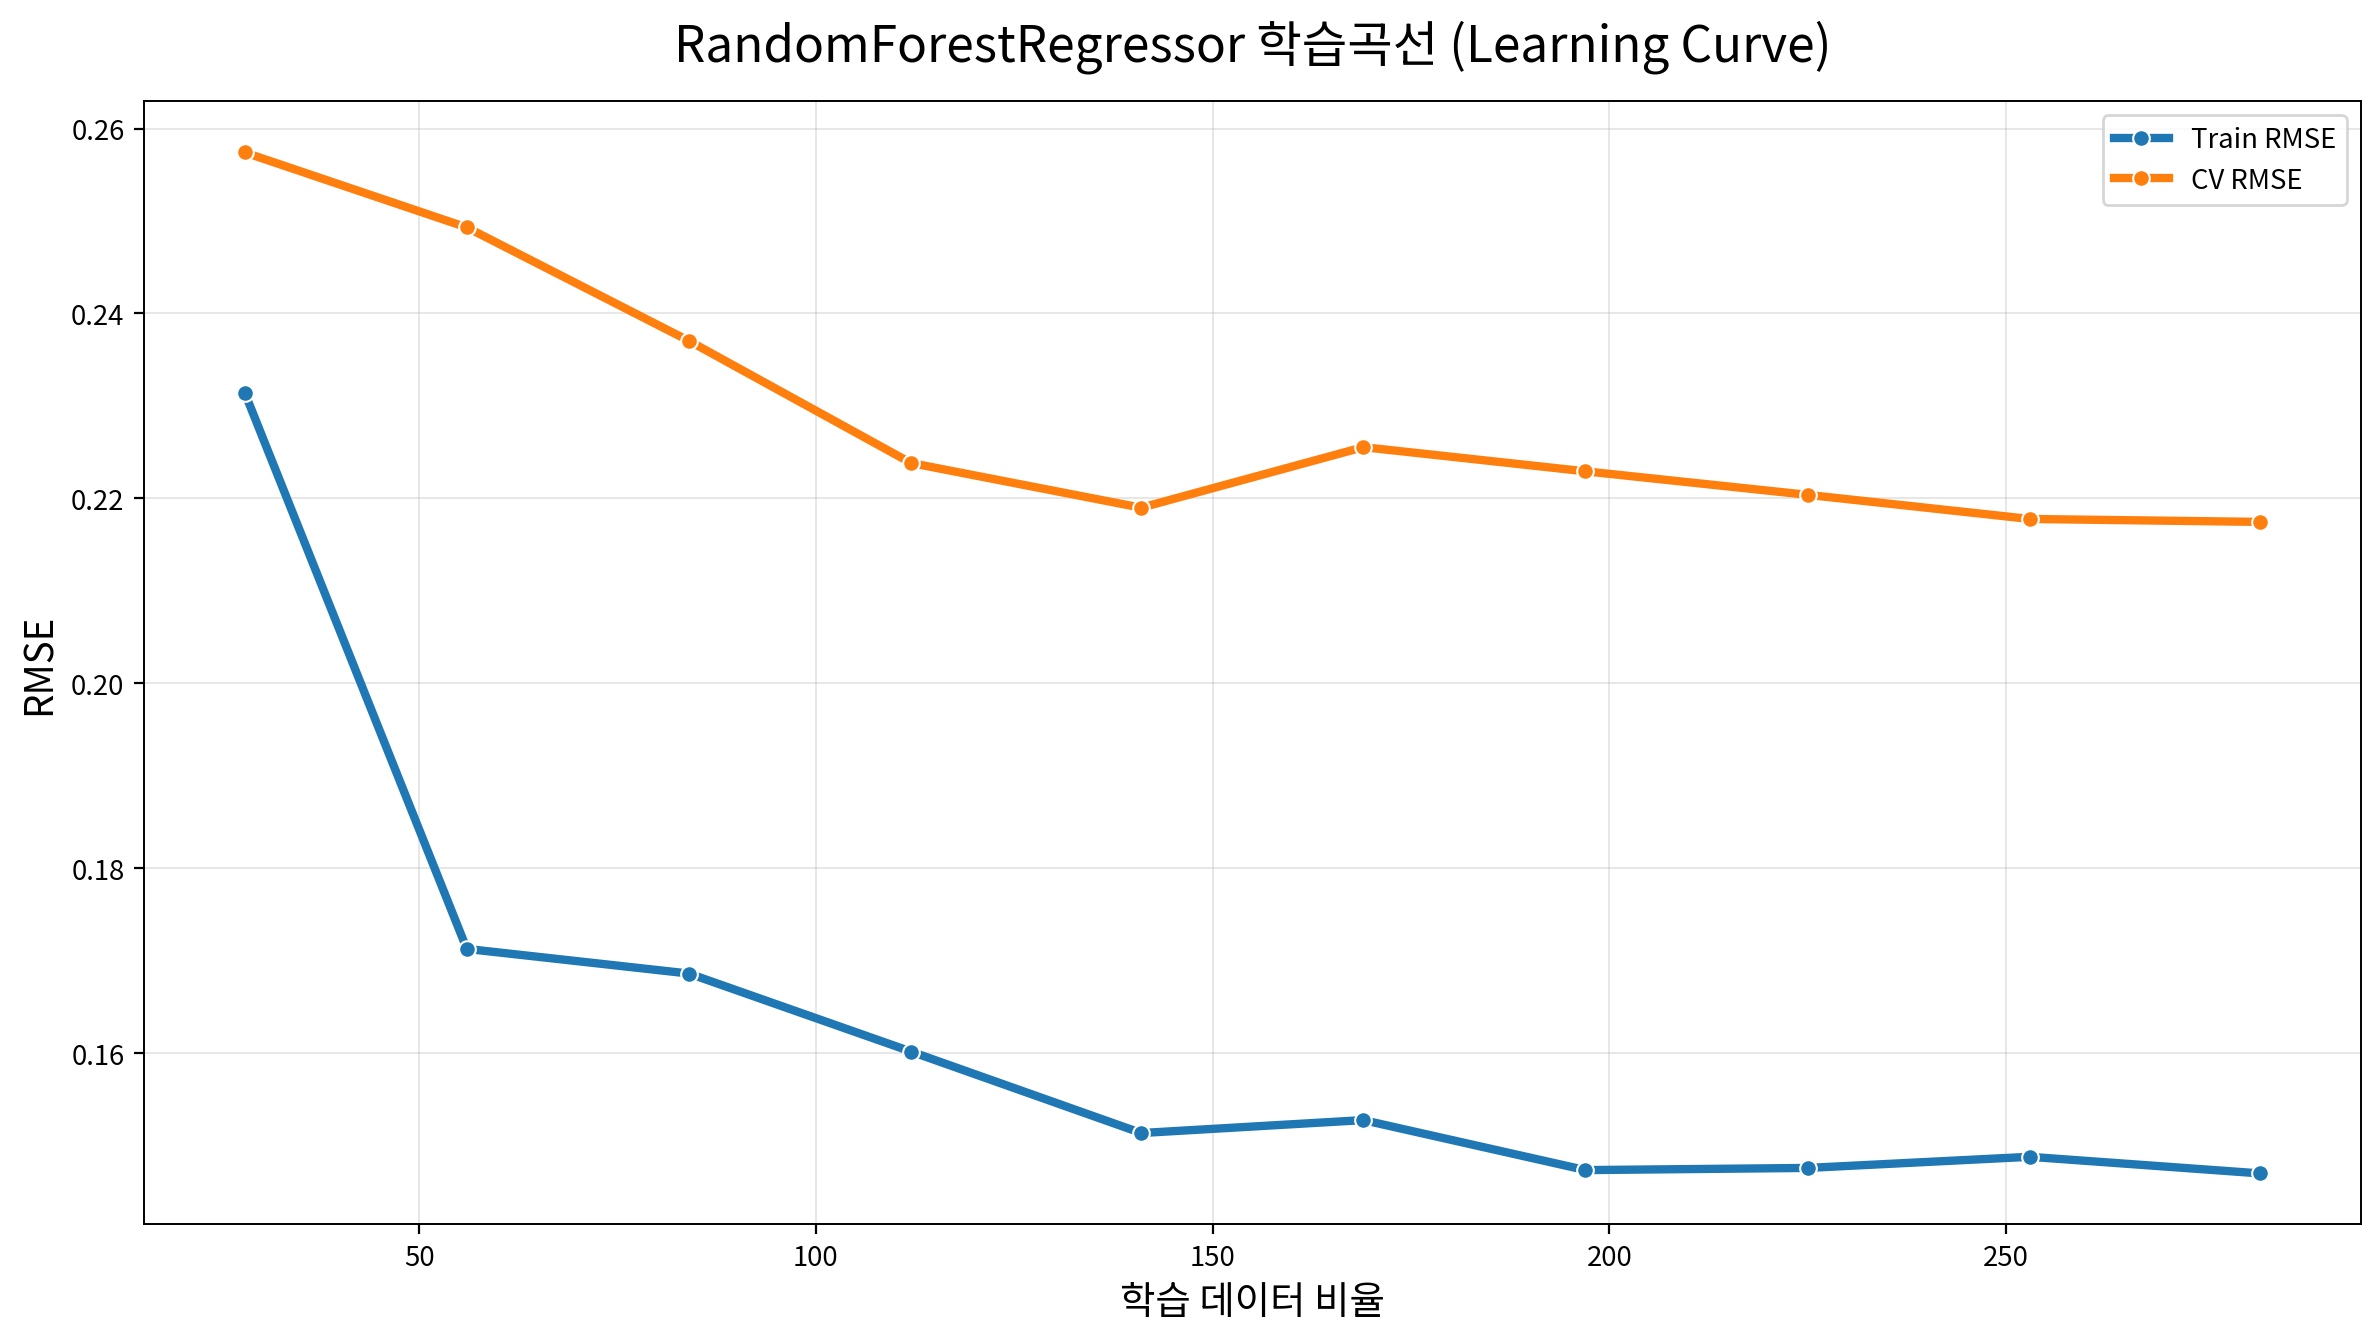

CPU times: total: 312 ms
Wall time: 4.68 s


,결정계수(R2),평균절대오차(MAE),평균제곱오차(MSE),평균오차(RMSE),평균 절대 백분오차 비율(MAPE),평균 비율 오차(MPE),Train RMSE,CV RMSE 평균,CV RMSE 표준편차,Train/CV 비율,CV 변동성 비율,판정 결과
RandomForestRegressor,0.678,0.168,0.046,0.215,0.010,0.302,0.147,0.217,0.013,0.676,0.062,⚠️ 과대적합


In [18]:
%%time
hs_get_score_cv(tuned, x_test_transformed, y_test_transformed, x_transformed, y_transformed)

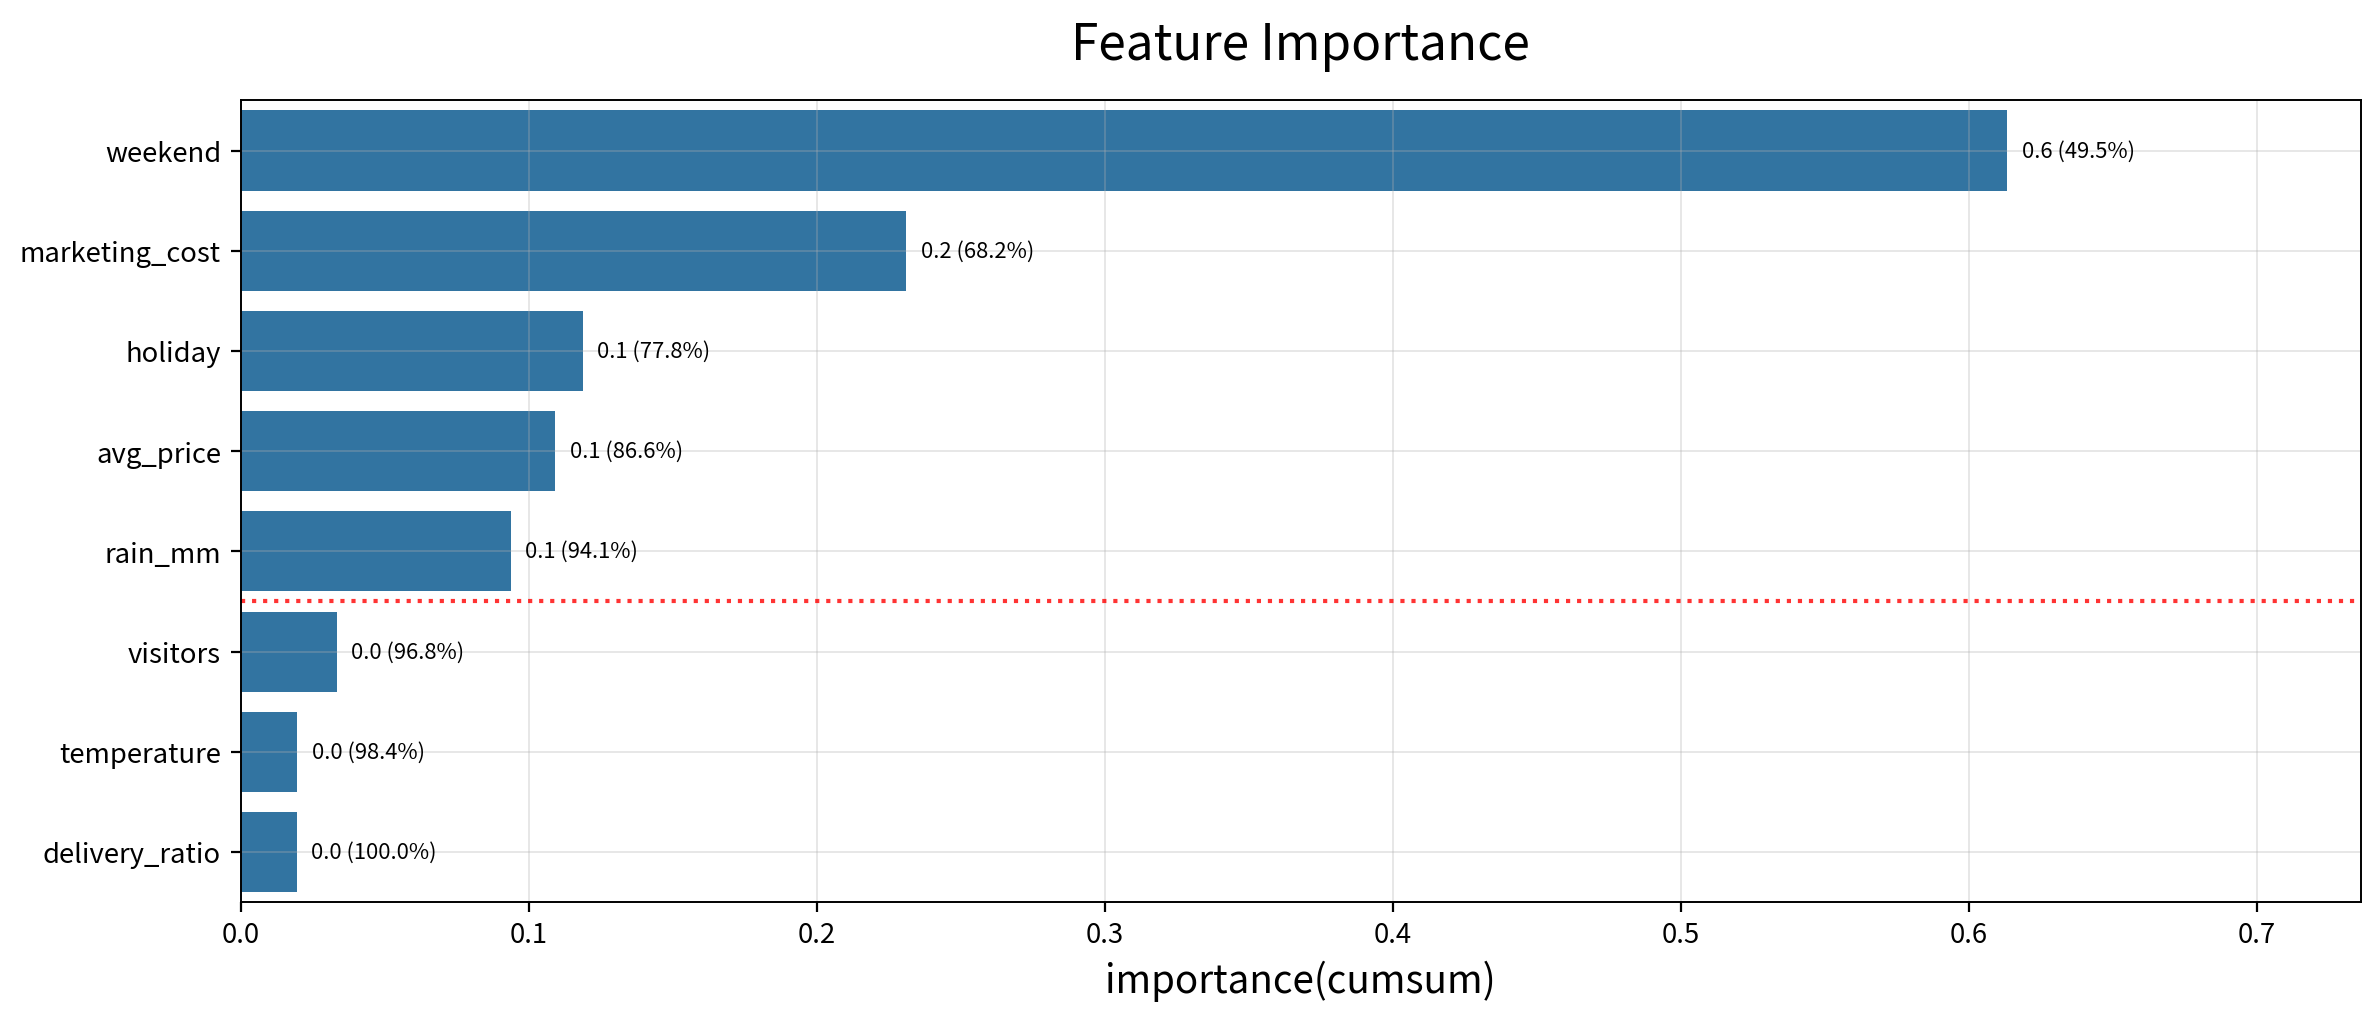

,importance,ratio,cumsum
weekend,0.613,0.495,0.495
marketing_cost,0.231,0.187,0.682
holiday,0.119,0.096,0.778
avg_price,0.109,0.088,0.866
rain_mm,0.094,0.076,0.941
visitors,0.033,0.027,0.968
temperature,0.020,0.016,0.984
delivery_ratio,0.020,0.016,1.000


In [19]:
hs_feature_importance(tuned, x_train_transformed, y_train_transformed)

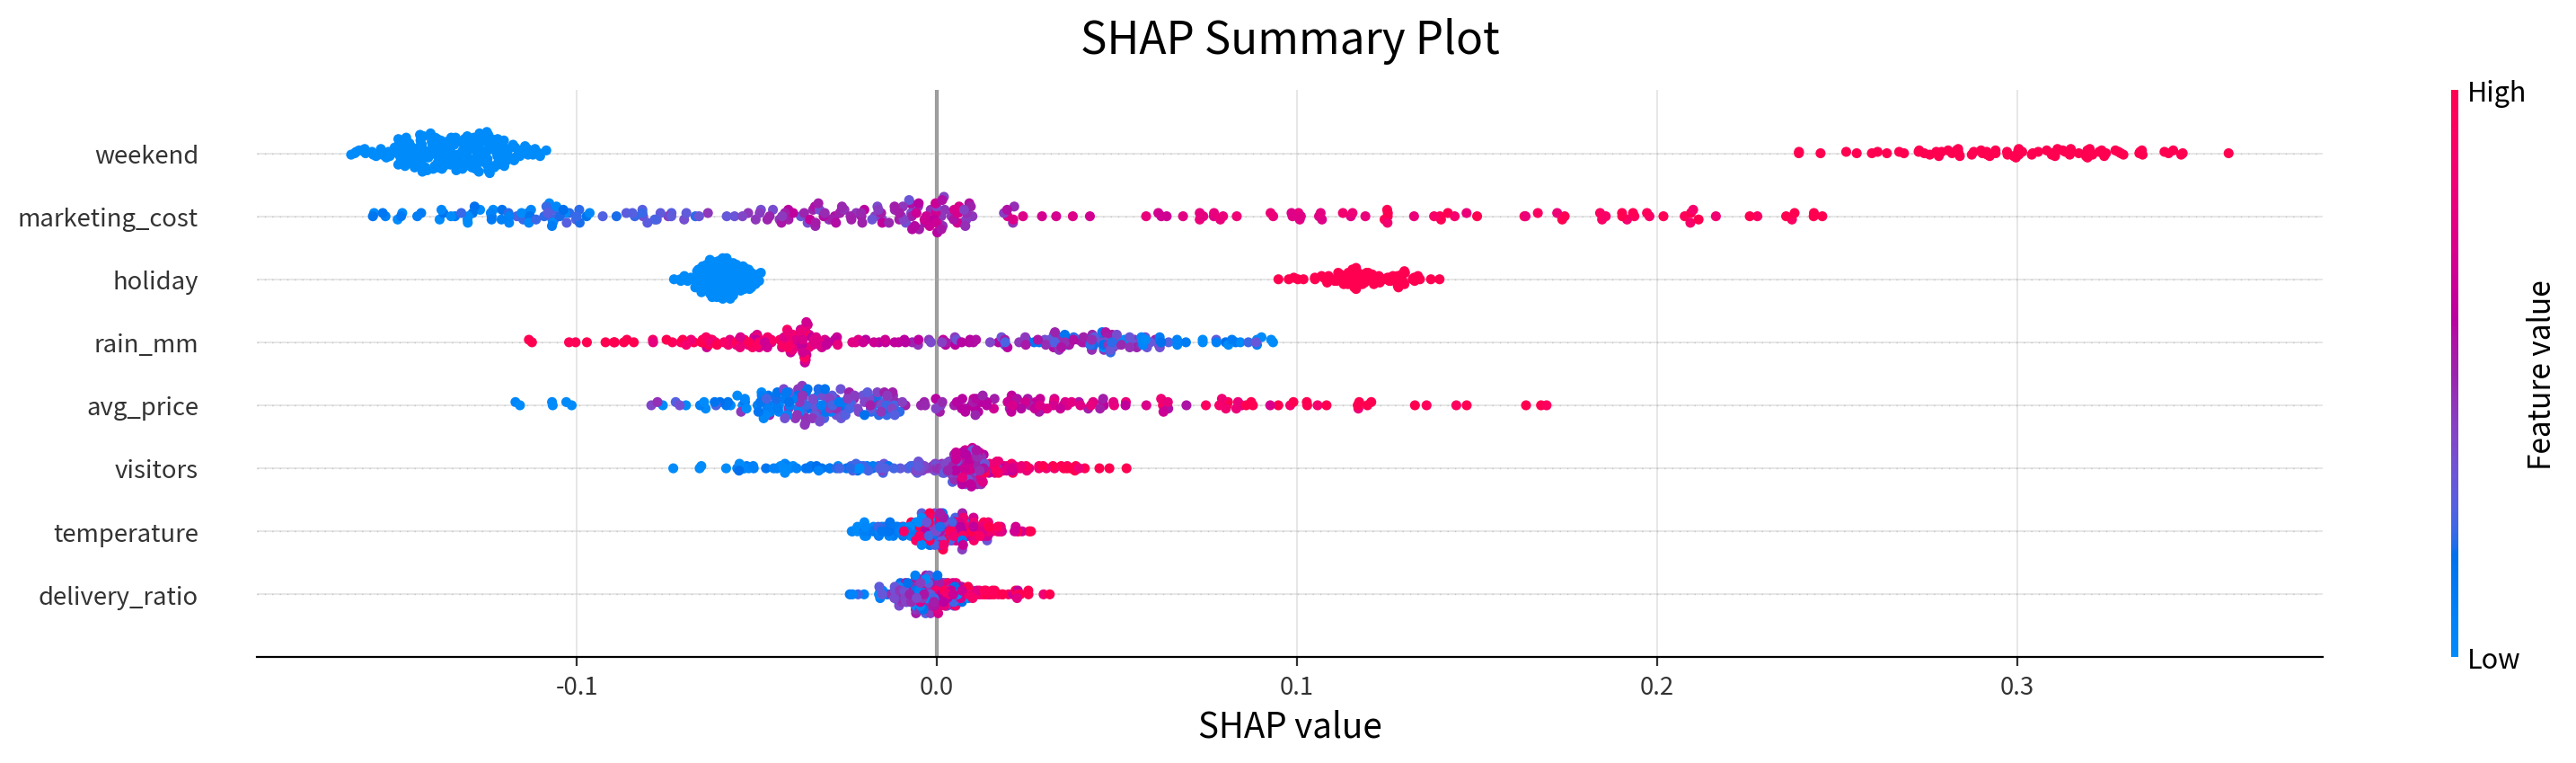

,feature,mean_abs_shap,mean_shap,std_shap,direction,cv,variability,importance_ratio,importance_cumsum,is_important
0,weekend,0.184,-0.004,0.200,음(-) 경향,1.088,variable,0.395,0.395,core
1,marketing_cost,0.081,0.001,0.104,양(+) 경향,1.277,variable,0.174,0.569,core
2,holiday,0.080,0.003,0.085,양(+) 경향,1.065,variable,0.171,0.740,core
3,rain_mm,0.046,-0.001,0.051,음(-) 경향,1.113,variable,0.098,0.838,secondary
4,avg_price,0.043,-0.002,0.054,음(-) 경향,1.252,variable,0.092,0.930,secondary
5,visitors,0.018,0.000,0.023,양(+) 경향,1.301,variable,0.038,0.969,secondary
6,temperature,0.008,0.000,0.010,양(+) 경향,1.292,variable,0.017,0.985,secondary
7,delivery_ratio,0.007,-0.000,0.009,음(-) 경향,1.330,variable,0.015,1.000,secondary


In [20]:
df, v = hs_shap_analysis(tuned, x_train_transformed, width=1600)
df